# Handling Imbalanced Data with Under Sampling

#### Balanced vs Imbalanced Dataset :

<b>Balanced Dataset</b>: In a Balanced dataset, there is approximately equal distribution of classes in the target column.<br>
<b>Imbalanced Dataset</b>: In an Imbalanced dataset, there is a highly unequal distribution of classes in the target column.

<b>Example</b> : Suppose there is a Binary Classification problem with the following training data:

Total Observations : 1000  
Target variable class is either  ‘Yes’ or ‘No’. <br>

<b>Case 1</b>:
If there are 900 ‘Yes’ and 100 ‘No’ then it represents an Imbalanced dataset as there is highly unequal distribution of the two classes. .

<b>Case 2</b>:
If there are 550 ‘Yes’ and 450 ‘No’ then it represents a Balanced dataset as there is approximately equal distribution of the two classes.

Hence, there is a significant amount of difference between the sample sizes of the two classes in an Imbalanced Dataset.

<b>Problem with Imbalanced dataset</b>:

1. Algorithms may get biased towards the majority class and thus tend to predict output as the majority class.<br>
2. Minority class observations look like noise to the model and are ignored by the model.<br>
3. Imbalanced dataset gives misleading accuracy score.

### Under Sampling
is this technique in which we reduce the sample size of Majority class and try to match it with the sample size of Minority Class. <br>
Example :
Let’s take an imbalanced training dataset with 1000 records.

Before Under Sampling :
Target class ‘Yes’ = 900 records
Target class ‘No’ = 100 records
<br>
After Under Sampling :
Target class ‘Yes’ = 100 records
Target class ‘No’ = 100 records<br>
Now, both classes have the same sample size.<br>

<b>Note</b> : Under Sampling should only be done when we have huge number of records.

### We will use Credit card fraudulent data to demonstrate Under Sampling technique using <i>NearMiss</i> algorithm.<br> You can download it from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">here</a>.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().values.any()

False

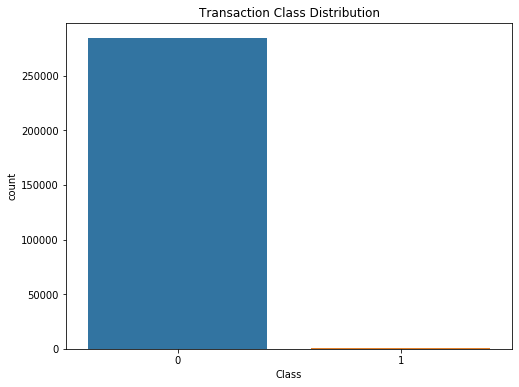

In [6]:
plt.figure(figsize=(8,6))
plt.title('Transaction Class Distribution')
sns.countplot('Class',data=data)

In [7]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [12]:
#Create independent and Dependent Features
X=data.drop('Class',axis=1)
Y=data['Class']

In [13]:
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


### NearMiss 
is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.
To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.

In [14]:
from imblearn.under_sampling import NearMiss

In [15]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [16]:
X_res.shape,y_res.shape

((984, 30), (984,))

In [17]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


<b>Conclusion:</b> The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.